### 가중치 시각화


In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

2024-04-07 22:07:58.017025: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-07 22:07:58.108453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 22:07:59.034576: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-07 22:07:59.963049: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-07 22:07:59.992067: 

In [2]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

첫번째 합성곱의 가중치 조사해보기
- weights 속성

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 가중치, 절편

(3, 3, 1, 32) (32,)


가중치 배열의 평균과 표준편차를 넘파이 메서드로 계산해보기

In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.027309708 0.26285568


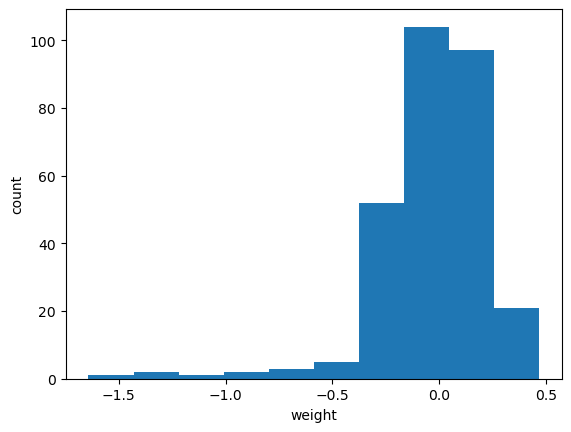

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

32개의 커널을 16*2 출력하기

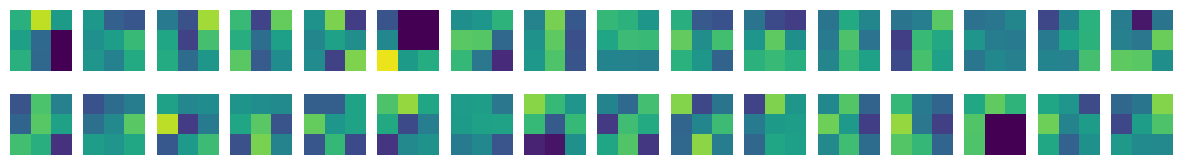

In [6]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+ j], vmin= -0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

훈련하지 않은 빈 합성곱 신경망 만들어보기

In [7]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
    'relu', padding='same', input_shape=(28,28,1)))

/home/leejieun/miniforge3/envs/ai/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


첫번째 층의 가중치를 변수에 저장

In [8]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [9]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.00024315383 0.08124081


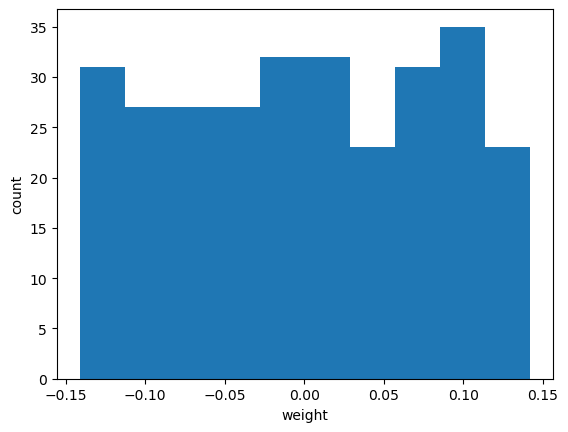

In [10]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

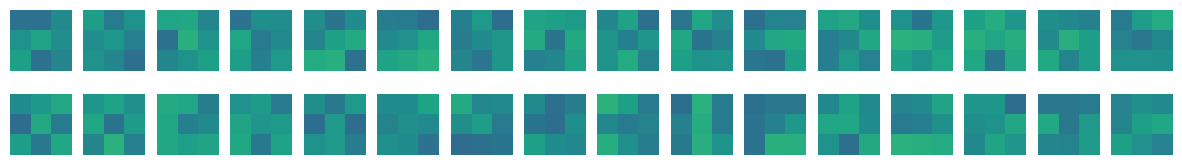

In [11]:
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [12]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_1>]

In [13]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

## 특성맵 시각화
훈련 세트에 있는 첫번째 샘플 그려보기

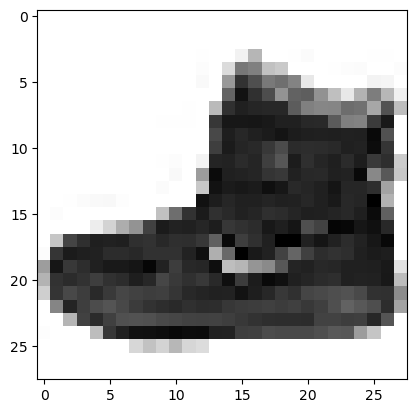

In [14]:
(train_input, train_target),(test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [15]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28, 28, 32)
- 첫번째 차원은 배치 차원: 샘플을 하나 입력했기 때문에 1

In [16]:
feature_maps.shape

(1, 28, 28, 32)

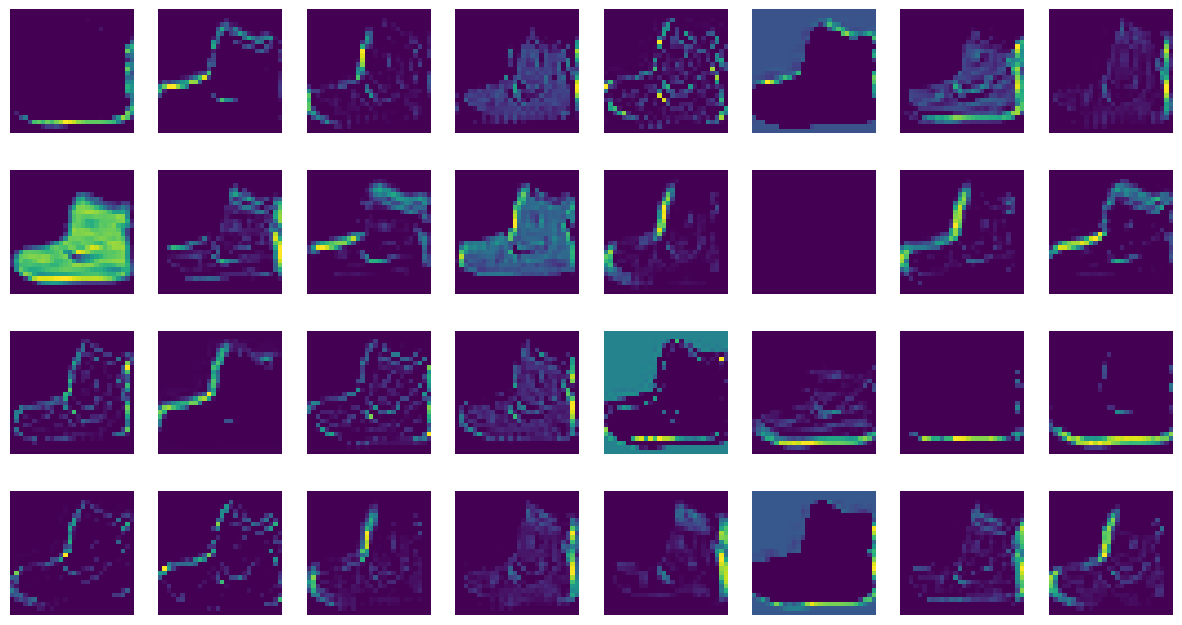

In [17]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

두번째 합성곱 층이 만든 특성맵 확인

In [19]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [20]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [21]:
print(feature_maps.shape)

(1, 14, 14, 64)


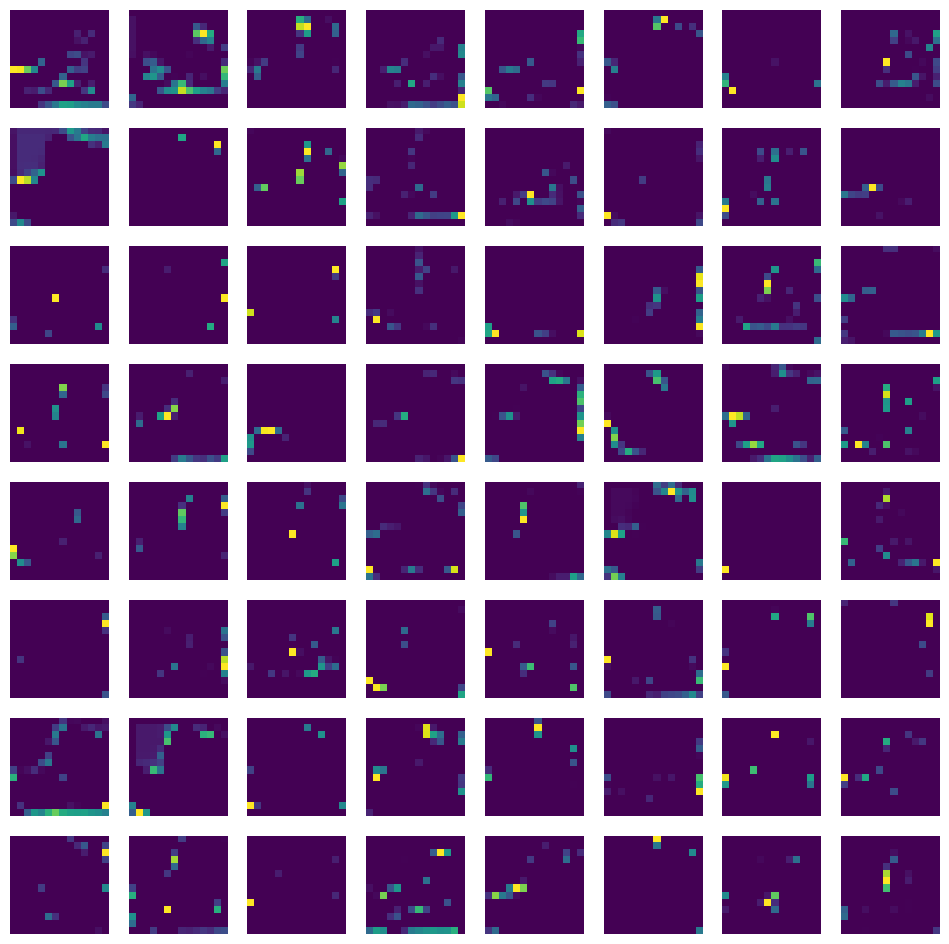

In [22]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()